<a href="https://colab.research.google.com/github/srimoyeeegangz/ML-lab-codes/blob/main/1(b)_used_cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded_cars=files.upload()

Saving used_cars.csv to used_cars.csv


In [ ]:
import pandas as pd

used_cars_df = pd.read_csv('used_cars.csv')
used_cars_df.head()


,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5


In [ ]:
# Check for missing values
print(used_cars_df.isnull().sum())

# Check datatypes
print(used_cars_df.dtypes)


id                        0
brand                     0
model                     0
year                      0
miles                     0
city_mileage              0
highway_mileage           0
horsepower                0
torque                    0
engine_capacity_litre     0
fuel_capacity             0
num_cylinder              0
num_seat                  0
num_owners                0
price                     0
link                      0
condition                51
type                      0
doors                     0
wheel_drive               0
engine_type               0
speed_levels              1
front_headroom            0
front_legroom             0
rear_headroom             0
rear_legroom              0
service_records           0
dtype: int64
id                         int64
brand                     object
model                     object
year                       int64
miles                      int64
city_mileage               int64
highway_mileage            int64


In [ ]:
used_cars_df['condition'] = used_cars_df['condition'].fillna(used_cars_df['condition'].median())
used_cars_df['speed_levels'] = used_cars_df['speed_levels'].fillna(used_cars_df['speed_levels'].median())


In [ ]:
used_cars_df = used_cars_df.drop(columns=['id', 'link'])


In [ ]:
categorical_cols = ['brand', 'model', 'type', 'engine_type']
used_cars_encoded = pd.get_dummies(used_cars_df, columns=categorical_cols)


In [ ]:
X = used_cars_encoded.drop(columns=['price'])
y = used_cars_encoded['price']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R²: {r2:.4f}')
print(f'MSE: {mse:.4f}')


R²: -0.0783
MSE: 6524626.5301


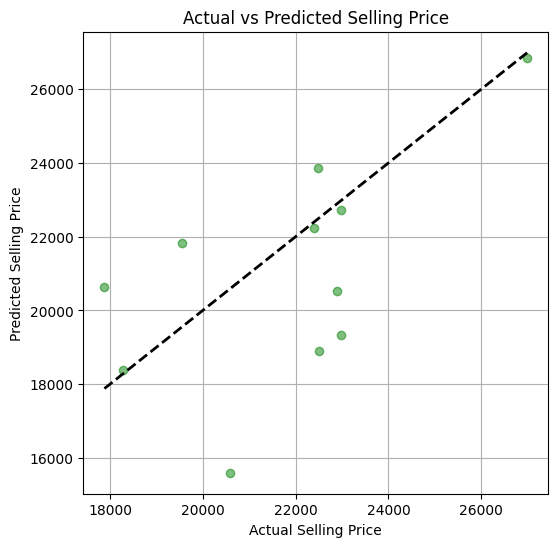

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.grid(True)
plt.show()
